<a href="https://colab.research.google.com/github/UKashNK/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Title: **PREDICTION OF PRODUCT SALES**

- Author: Katende Ukasha Ndugwa

##Project Overview

##Load and Inspect Data

In [5]:
#importing necessary modules
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

#loading data
path = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##Cleaning the Data

### Inspecting the data

In [6]:
df.shape

(8523, 12)

In [7]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
df['Outlet_Size'] = df['Outlet_Size'].fillna("MISSING")
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
no_weight = df['Item_Weight'].isna()
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [12]:
df['Item_Weight'] = df['Item_Weight'].fillna(-1)
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
string_cols = df.select_dtypes("object").columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [14]:
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  print("\n")

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [15]:
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [16]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace(["low fat","LF"],"Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("reg","Low Fat")
df["Item_Fat_Content"].value_counts()

Low Fat    5634
Regular    2889
Name: Item_Fat_Content, dtype: int64

In [17]:
num_cols = df.select_dtypes("number").columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [18]:
for col in num_cols:
  minimum = df[col].min()
  maximum = df[col].max().round(4)
  mean = df[col].mean().round(4)
  print(f"The Summary statistics for {col} are: \nminimum:{minimum}\nmaximum:{maximum}\nmean:{mean}\n ")

The Summary statistics for Item_Weight are: 
minimum:-1.0
maximum:21.35
mean:10.4789
 
The Summary statistics for Item_Visibility are: 
minimum:0.0
maximum:0.3284
mean:0.0661
 
The Summary statistics for Item_MRP are: 
minimum:31.29
maximum:266.8884
mean:140.9928
 
The Summary statistics for Outlet_Establishment_Year are: 
minimum:1985
maximum:2009
mean:1997.8319
 
The Summary statistics for Item_Outlet_Sales are: 
minimum:33.29
maximum:13086.9648
mean:2181.2889
 


##Exploratory Data Analysis

In [19]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Histograms to view the distributions of numerical features**

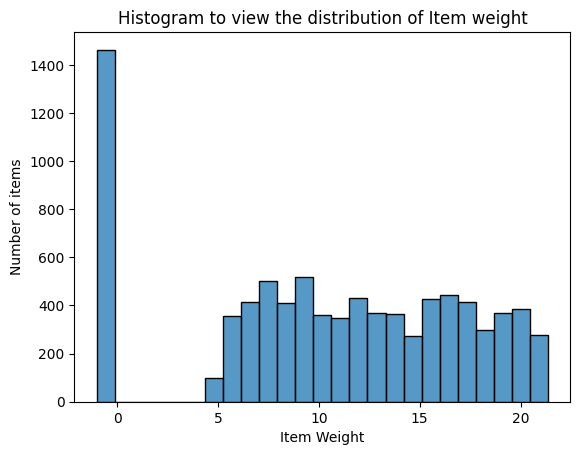

In [43]:
#Investigating Item weight
ax = sns.histplot(data=df, x="Item_Weight")
ax.set(title="Histogram to view the distribution of Item weight",ylabel="Number of items",xlabel="Item Weight");

The large bar below zero is due placeholder value -1 in the data

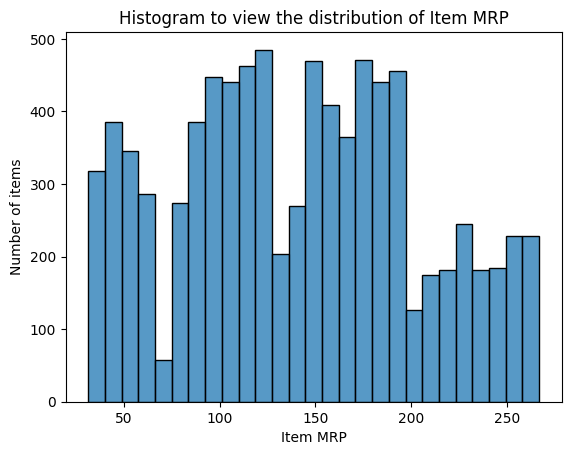

In [46]:
#Investigating Item MRP
ax = sns.histplot(data=df, x="Item_MRP")
ax.set(title="Histogram to view the distribution of Item MRP",ylabel="Number of items",xlabel="Item MRP");

**Boxplots to view statistical summaries of numerical features**

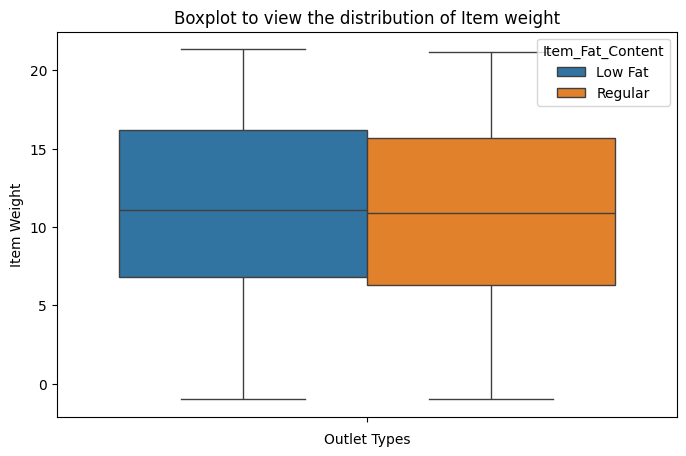

In [58]:
#Investigating Item Weight
fig,ax =plt.subplots(figsize=(8,5))
sns.boxplot(data=df, y="Item_Weight",hue="Item_Fat_Content",ax=ax)
ax.set(title="Boxplot to view the distribution of Item weight",xlabel="Outlet Types",ylabel="Item Weight");

The median weight of the items sold is just above 10 for both regular and low fat items

**Countplots to view the frequency of each class of categorial features**

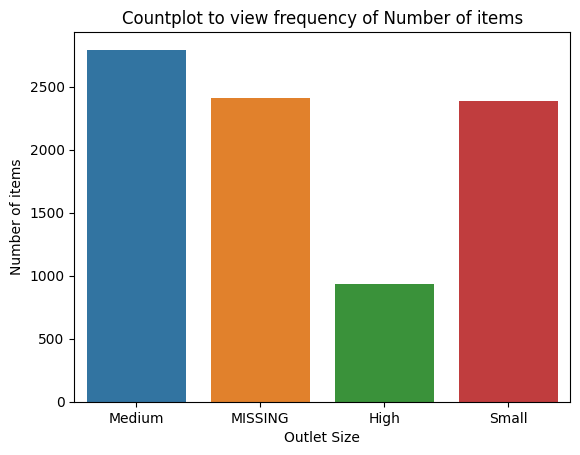

In [56]:
#Investigating Outlet size and items sold
ax = sns.countplot(data=df, x="Outlet_Size",hue="Outlet_Size")
ax.set(title="Countplot to view frequency of Number of items",ylabel="Number of items",xlabel="Outlet Size");

The medium outlet size sells the most items.
The High outlet size sells the least items.


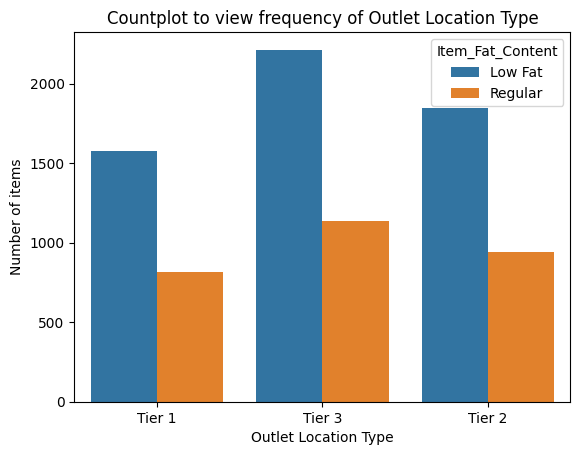

In [60]:
#Investigating Outlet location type and items sold
ax = sns.countplot(data=df, x="Outlet_Location_Type",hue="Item_Fat_Content")
ax.set(title="Countplot to view frequency of Outlet Location Type",ylabel="Number of items",xlabel="Outlet Location Type");

Low fat items sell better tha regular fat items in all Outlet location types

**Heatmap to view the correlation between features**

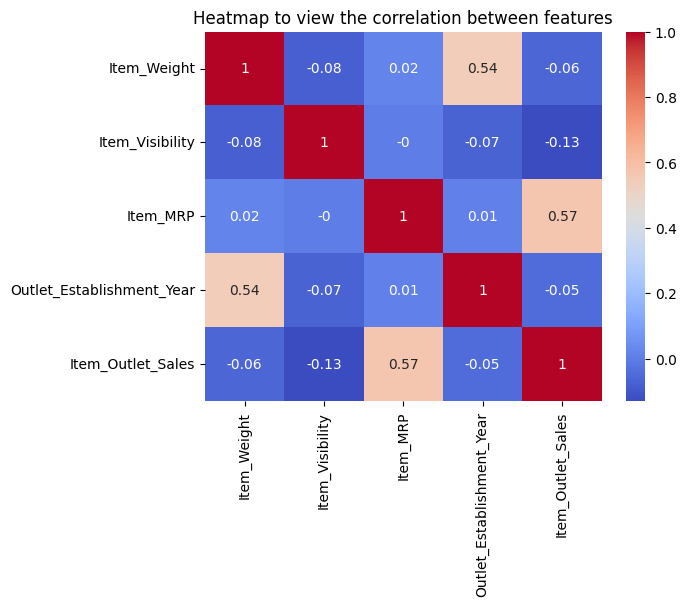

In [36]:
#calculating correlations
corr = df.corr(numeric_only=True).round(2)

#Drawing Heatmap
ax = sns.heatmap(corr,cmap="coolwarm",annot=True)
ax.set(title="Heatmap to view the correlation between features");

- There is a moderate positive correlation betweeen Item MRP and Item Outlet Sales
- There is a moderate positive correlation betweeen Item Weight and Outlet Establishment Year

##Feature Inspection